Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

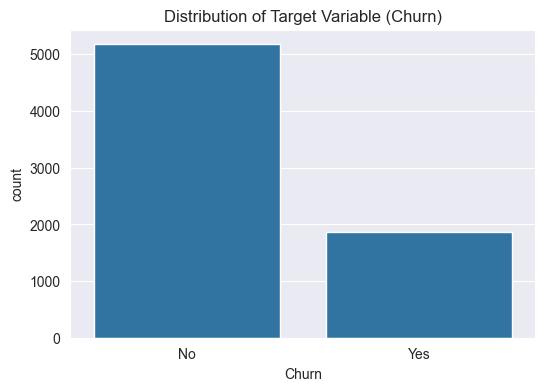

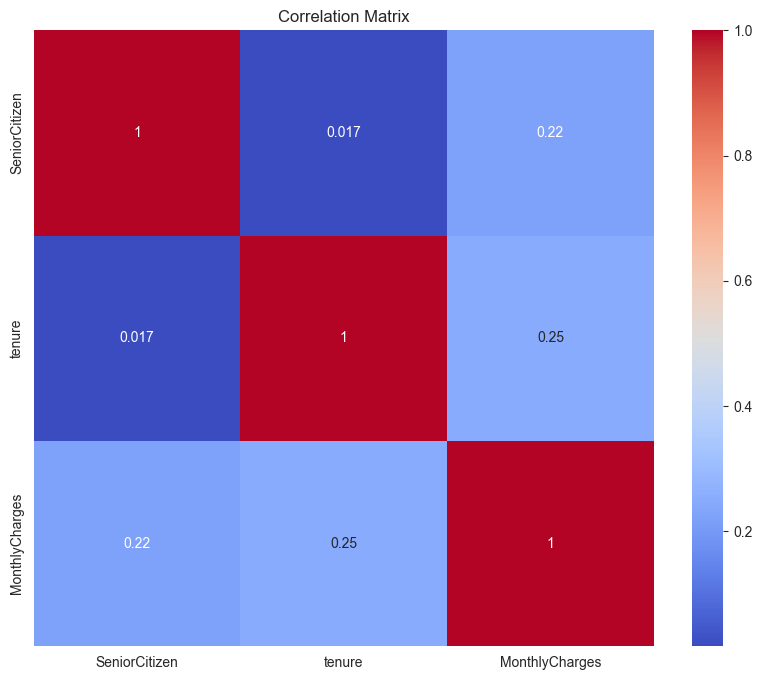

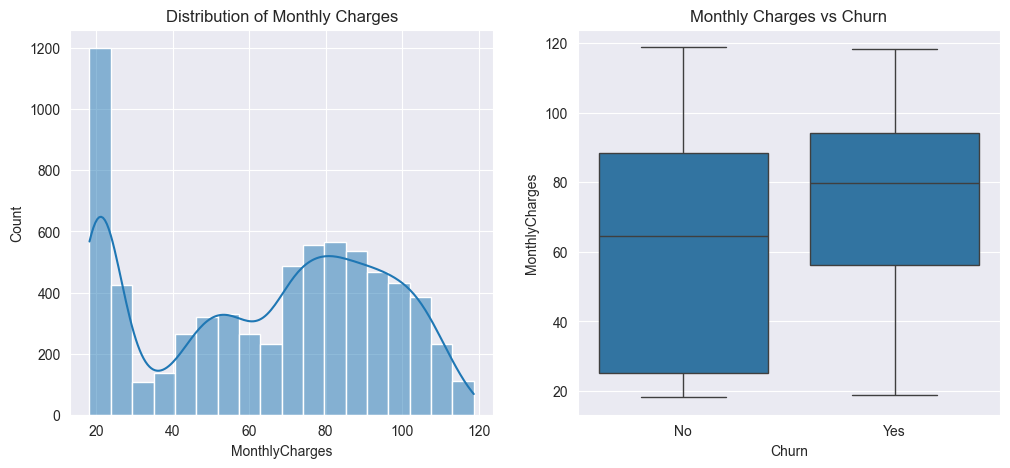

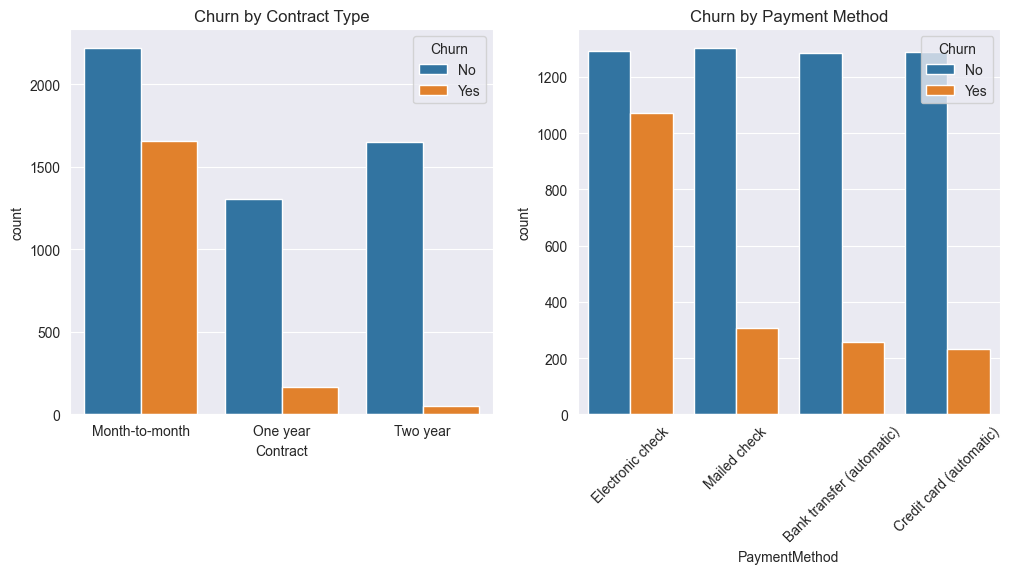

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data (Replace 'data.csv' with your actual file path)
# If you don't have data yet, download "Telco Customer Churn" from Kaggle
df = pd.read_csv('../data/raw/data.csv')

# 2. Basic Inspection (Required for Report)
print("Shape:", df.shape)
print(df.info())
print(df.describe())

# 3. Target Balance Check (Chart 1 - Essential for Industrial ML)
# Checks for 'Imbalance' which is a specific challenge mentioned in the doc
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Target Variable (Churn)')
plt.show()

# 4. Correlation Matrix (Chart 2 - Feature Analysis)
# Identifies numerical relationships
plt.figure(figsize=(10, 8))
# Note: This requires numeric data. We will encode categorical data in the next step.
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Numerical Distributions (Charts 3 & 4)
# Checks for outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Monthly Charges')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')
plt.show()

# 6. Categorical Analysis (Charts 5 & 6)
# Checks relationship between categories (e.g., Contract Type) and Churn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Churn by Contract Type')
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()